In [1]:
from sklearn.model_selection  import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import precision_score , recall_score , f1_score , confusion_matrix
from sklearn.metrics import precision_recall_curve , PrecisionRecallDisplay 
from sklearn.metrics import roc_curve , RocCurveDisplay , roc_auc_score
from sklearn.naive_bayes import GaussianNB
import math
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#IMPORTING DATA
df = pd.read_csv("data.csv" , index_col = 0)
df.head(10)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
5,23,8,0,44.0,0,1,14,31,19,12,3,1,0,0
6,105,8,1,34.0,0,1,14,31,19,12,3,1,0,0
7,13,8,1,37.0,1,0,14,31,19,12,3,1,6,0
8,13,8,1,39.0,1,0,14,31,19,12,3,1,5,0
9,13,8,1,56.0,1,0,14,31,19,12,3,1,4,0


In [3]:
nLocation = pd.cut(df.location, bins=5 , labels=np.arange(5), right=False)
df['location'] = nLocation

nCountry = pd.cut(df.country, bins=5 , labels=np.arange(5), right=False)
df['country'] = nCountry

nAge = pd.cut(df.age, bins=5, labels=np.arange(5), right=False)
df['age'] = nAge

df.head(5)


,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,3,1,1,3,1,0,14,31,19,12,3,1,8,1
1,3,1,0,2,0,1,14,31,19,12,3,1,0,0
2,4,1,1,2,0,1,14,31,19,12,3,1,13,0
3,4,1,0,3,1,0,14,31,19,12,3,1,0,0
4,4,1,1,2,0,0,14,31,19,12,3,1,0,0


In [4]:
label_encoder = LabelEncoder()
df['location'] = label_encoder.fit_transform(df['location'])
encoder = OneHotEncoder(sparse=False)
df[['loc0','loc1', 'loc2' , 'loc3' , 'loc4'   ]] = encoder.fit_transform(df['location'].values.reshape(-1,1))

label_encoderC = LabelEncoder()
df['country'] = label_encoderC.fit_transform(df['country'])
encoderC = OneHotEncoder(sparse=False)
df[['Coun0','Coun1', 'Coun2' , 'Coun3' , 'Coun4' ]] = encoderC.fit_transform(df['country'].values.reshape(-1,1))

label_encoderG = LabelEncoder()
df['gender'] = label_encoderG.fit_transform(df['gender'])
encoderG = OneHotEncoder(sparse=False)
df[['Man','Woman', 'Other']] = encoderG.fit_transform(df['gender'].values.reshape(-1,1))

df = df.drop("location", axis=1)
df = df.drop("country", axis=1)
df = df.drop("gender", axis=1)
df.head(10)


,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,...,loc3,loc4,Coun0,Coun1,Coun2,Coun3,Coun4,Man,Woman,Other
0,3,1,0,14,31,19,12,3,1,8,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,1,14,31,19,12,3,1,13,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,1,0,14,31,19,12,3,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,0,14,31,19,12,3,1,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5,2,0,1,14,31,19,12,3,1,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1,0,1,14,31,19,12,3,1,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1,1,0,14,31,19,12,3,1,6,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8,1,1,0,14,31,19,12,3,1,5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2,1,0,14,31,19,12,3,1,4,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
#Reordering the columns
df = df[['age', 'vis_wuhan', 'from_wuhan' , 'symptom1' , 'symptom2' , 'symptom3' , 'symptom4' , 'symptom5' , 'symptom6' , 'diff_sym_hos' ,'loc0','loc1', 'loc2' , 'loc3' , 'loc4' , 'Coun0','Coun1', 'Coun2' , 'Coun3' , 'Coun4' ,'Man','Woman' ,'Other' , 'result']]
X = df.iloc[:,0:23].values
Y = df.iloc[:, 23:24].values

scaler = MinMaxScaler(feature_range=(0, 1))
nX = scaler.fit_transform(X)
nY = scaler.fit_transform(Y)


In [6]:
k_range = range(1,21)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, nX, nY.ravel(), cv=5, scoring='accuracy')
    k_scores.append(scores.mean())
    
for i in range(20):
    print(k_scores[i] , "\n")
    

0.8546511627906976 

0.8755813953488373 

0.8465116279069766 

0.8732558139534883 

0.8627906976744185 

0.8755813953488373 

0.8744186046511627 

0.877906976744186 

0.8558139534883722 

0.8534883720930233 

0.8593023255813954 

0.8581395348837209 

0.8569767441860465 

0.8767441860465116 

0.8779069767441859 

0.877906976744186 

0.8802325581395347 

0.8755813953488373 

0.8767441860465116 

0.8755813953488373 



In [7]:
print('Optimum K accuracy: ', max(k_scores))

Optimum K accuracy:  0.8802325581395347


Text(0, 0.5, 'Accuracy')

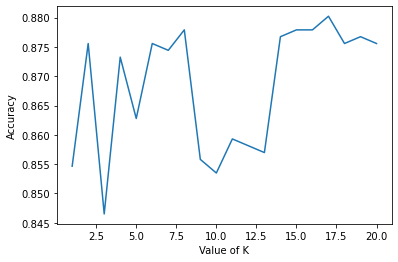

In [8]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K')
plt.ylabel('Accuracy')

In [9]:
knn = KNeighborsClassifier(n_neighbors=17)
scores = cross_val_score(knn, nX, nY.ravel(), cv=5, scoring='accuracy')
print(scores)

KNN_Average = scores.mean()
print(scores.mean())

[0.86046512 0.88372093 0.86627907 0.88372093 0.90697674]
0.8802325581395347


In [10]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(nX,nY.ravel())
y_train_pred = cross_val_predict(knn,nX,nY.ravel(), cv = 5)


In [11]:
Precision_KNN = precision_score(nY, y_train_pred)
Confusion_Matrix_KNN = confusion_matrix(nY, y_train_pred)
print(Confusion_Matrix_KNN , "\n")
print(Precision_KNN , "\n")
Recall_KNN = recall_score(nY, y_train_pred)
print(Recall_KNN , "\n")
F1_KNN = f1_score(nY,y_train_pred)
print(F1_KNN , "\n")

[[747   5]
 [ 98  10]] 

0.6666666666666666 

0.09259259259259259 

0.16260162601626016 



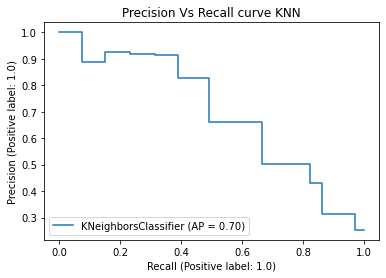

In [12]:
y_scores = cross_val_predict(knn,nX,nY.ravel(), cv=5)
precisions, recalls, thresholds = precision_recall_curve(nY, y_scores)
display = PrecisionRecallDisplay.from_estimator(knn,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve KNN")

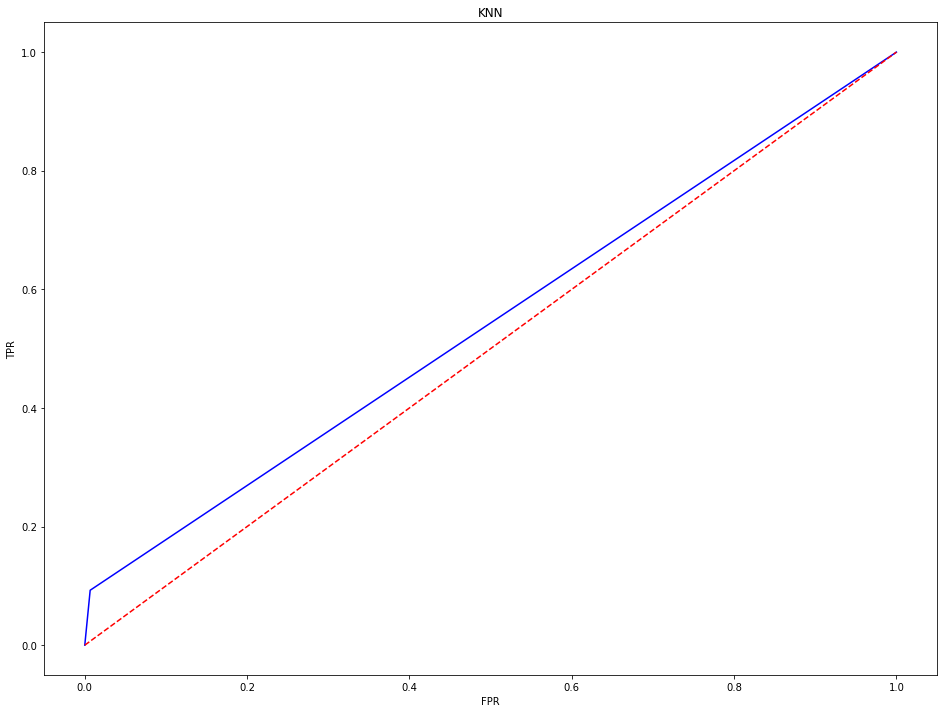

In [13]:
fpr, tpr, threshold = roc_curve(nY, y_scores)
plt.figure(figsize = (16,12))
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.title("KNN")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [14]:
print(precisions)
print(recalls)
print(thresholds)

AUC_KNN = roc_auc_score(nY, y_scores)
print(AUC_KNN , "\n")


[0.1255814  0.66666667 1.        ]
[1.         0.09259259 0.        ]
[0. 1.]
0.5429718282111898 



In [15]:
# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
log_clf = LogisticRegression()
scores_Log = cross_val_score(log_clf, nX, nY.ravel(), cv=5, scoring='accuracy')
Log_Average = scores_Log.mean()
print(scores_Log)

[0.9244186  0.88953488 0.9127907  0.94767442 0.93023256]


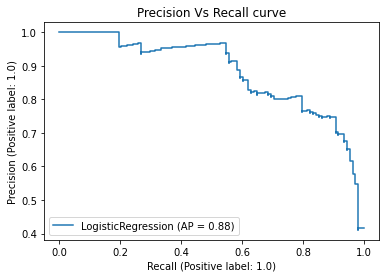

In [18]:
log_clf.fit(nX,nY.ravel())
y_train_log = cross_val_predict(log_clf,nX,nY.ravel(), cv = 5)
precisions_log, recalls_log, thresholds_log = precision_recall_curve(nY, y_train_log)
display = PrecisionRecallDisplay.from_estimator(log_clf,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall curve")

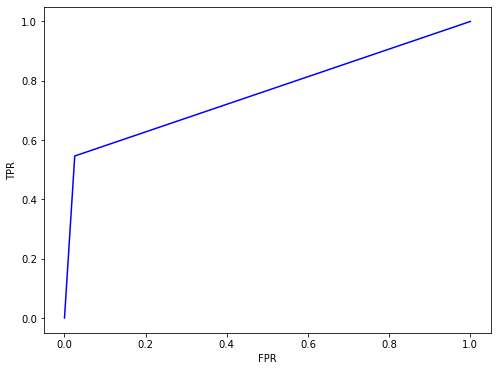

In [19]:
fpr_log, tpr_log, threshold_log = roc_curve(nY, y_train_log)
plt.figure(figsize = (8,6))
plt.plot(fpr_log, tpr_log, 'b')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [20]:
AUC_log = roc_auc_score(nY, y_train_log)
print(AUC_log)
print(precisions_log)
print(recalls_log)
print(thresholds_log)

0.7605151694247438
[0.1255814  0.75641026 1.        ]
[1.        0.5462963 0.       ]
[0. 1.]


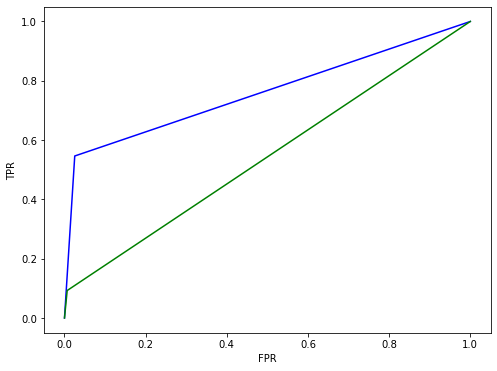

In [21]:
plt.figure(figsize = (8,6))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot(fpr, tpr, 'g')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [22]:
print("Area Under the Curve for logistic Regression Classifier is: " , AUC_log)
print("Area Under the Curve for KNN classifier is                : " , AUC_KNN)

Area Under the Curve for logistic Regression Classifier is:  0.7605151694247438
Area Under the Curve for KNN classifier is                :  0.5429718282111898


In [23]:
# NAIVE BAYES CLASSIFIER

In [24]:
nb_clf = GaussianNB(priors = None)
scores_NB = cross_val_score(nb_clf, nX, nY.ravel(), cv=5, scoring='accuracy')
NB_Average = scores_NB.mean()
for i in range(5):
    print(scores_NB[i] , "\n")

  

0.27325581395348836 

0.3023255813953488 

0.23837209302325582 

0.3430232558139535 

0.5406976744186046 



In [25]:
print("KNN Average of the folds is                : ", KNN_Average)
print("Logistic Regression Average of the folds is: " ,Log_Average)
print("Naive Bayes classifier Average of the folds is: " , NB_Average)  

KNN Average of the folds is                :  0.8802325581395347
Logistic Regression Average of the folds is:  0.9209302325581395
Naive Bayes classifier Average of the folds is:  0.3395348837209302


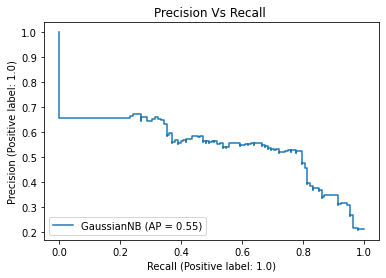

In [26]:
nb_clf.fit(nX,nY.ravel())
y_train_nb = cross_val_predict(nb_clf,nX,nY.ravel(), cv = 5)
precisions_nb, recalls_nb, thresholds_nb = precision_recall_curve(nY, y_train_nb)
display = PrecisionRecallDisplay.from_estimator(nb_clf,nX,nY)
_ = display.ax_.set_title("Precision Vs Recall ")

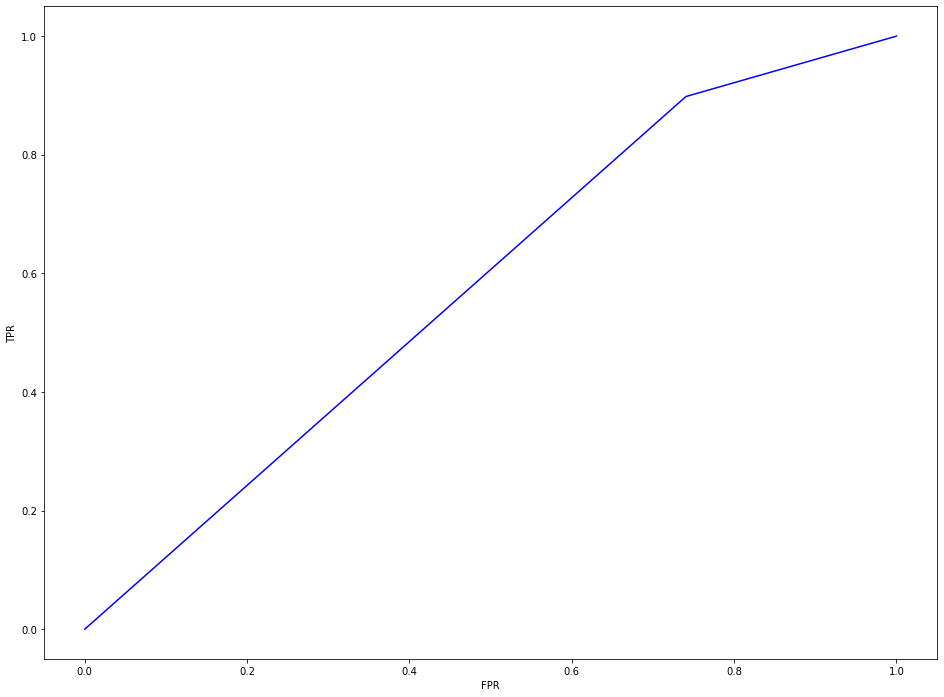

In [27]:
fpr_nb, tpr_nb, threshold_nb = roc_curve(nY, y_train_nb)
plt.figure(figsize = (16,12))
plt.plot(fpr_nb, tpr_nb, 'b')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [28]:
AUC_nb = roc_auc_score(nY, y_train_nb)
print(AUC_nb)
print(precisions_nb)
print(recalls_nb)
print(thresholds_nb)

0.578728329393223
[0.1255814  0.14831804 1.        ]
[1.         0.89814815 0.        ]
[0. 1.]


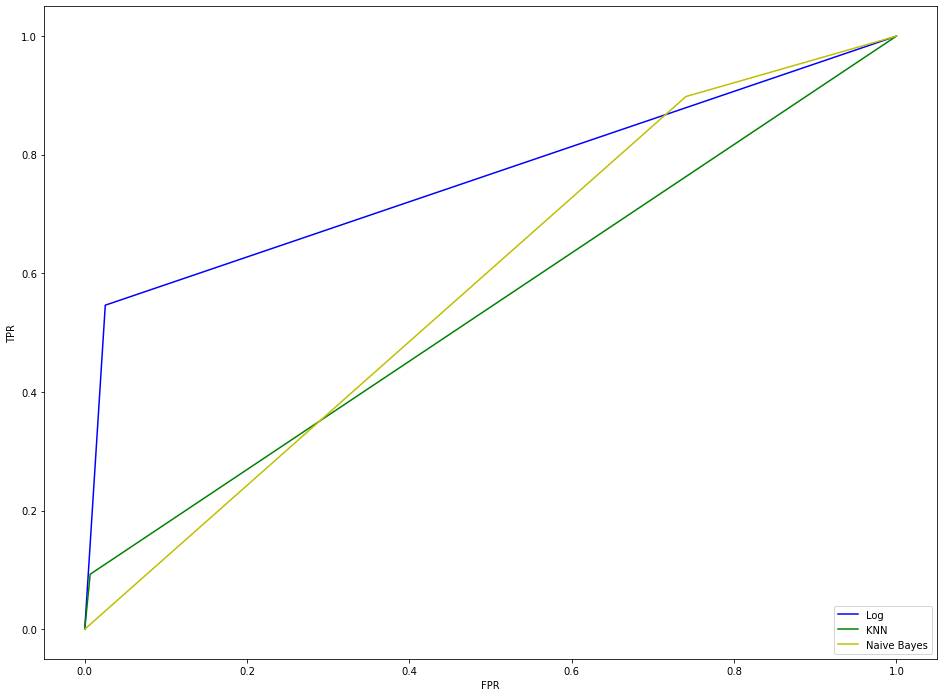

In [29]:
plt.figure(figsize = (16,12))
plt.plot(fpr_log, tpr_log, 'b')
plt.plot(fpr, tpr, 'g')
plt.plot(fpr_nb, tpr_nb, 'y')
plt.legend(["Log", "KNN" ,"Naive Bayes"], loc ="lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [30]:
print("AUC logistic Regression Classifier is: " , AUC_log)
print("AUC KNN classifier is                : " , AUC_KNN)
print("AUC Naive Bayes classifier is        : " , AUC_nb)


AUC logistic Regression Classifier is:  0.7605151694247438
AUC KNN classifier is                :  0.5429718282111898
AUC Naive Bayes classifier is        :  0.578728329393223
